<a href="https://colab.research.google.com/github/rdotjain/shopper-intent-prediction/blob/main/Shopper_Intent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shopper intent prediction from clickstream e-commerce data with minimal browsing information

In [ ]:
import pandas as pd
import numpy as np

### Pre-Processing the data:
1. Symbolisation
2. Assigning labels
3. Trimming lengths
4. Random Sampling
5. Padding the sequences

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SEM-5/Machine Learning/Project/release_10_23_2020.csv")

In [ ]:
df.head()

,session_id_hash,event_type,product_action,product_skus_hash,server_timestamp_epoch_ms,hashed_url
0,00000005c19449b57d8d05dfc8b5474be0654032,pageview,NaN,NaN,1544469996111,da99729886aff70a02733b6cd69ee7df35622d9302347e...
1,00006a0ada94a5186163a25e9ed9c94481c820d9,pageview,NaN,NaN,1545737959865,e2f7e0cee4272e804f0d323a3513dd01716a5a40ab9abf...
2,00007d15aeb741b3cdd873cb3933351d699cc320,pageview,NaN,NaN,1544908835402,ea7b2493be61ff454f8cce412f9dc281e605daec8c43b5...
3,00007d15aeb741b3cdd873cb3933351d699cc320,pageview,NaN,NaN,1544908847263,ea7b2493be61ff454f8cce412f9dc281e605daec8c43b5...
4,00007d15aeb741b3cdd873cb3933351d699cc320,pageview,detail,90add4dd072e160034e98ddea257e0b59441eae00d8955...,1544909035879,8fa1ecf31ececb27ebe9c529966f3d1f907542fe138d5d...


In [ ]:
df['product_action'].unique()

array([nan, 'detail', 'click', 'add', 'purchase', 'remove'], dtype=object)

In [ ]:
df.drop(columns=['event_type', 'product_skus_hash', 'server_timestamp_epoch_ms', 'hashed_url'], axis=1, inplace=True)

In [ ]:
df.head()

,session_id_hash,product_action
0,00000005c19449b57d8d05dfc8b5474be0654032,NaN
1,00006a0ada94a5186163a25e9ed9c94481c820d9,NaN
2,00007d15aeb741b3cdd873cb3933351d699cc320,NaN
3,00007d15aeb741b3cdd873cb3933351d699cc320,NaN
4,00007d15aeb741b3cdd873cb3933351d699cc320,detail


In [ ]:
df.shape

(5433611, 6)

In [ ]:
df['product_action'].replace(np.nan,1, inplace=True)

In [ ]:
symbols = {
    'detail': 2,
    'add': 3,
    'remove': 4,
    'purchase': 5,
    'click': 6
}
df['product_action'].replace(symbols, inplace=True)

In [ ]:
df.head()

,session_id_hash,product_action
0,00000005c19449b57d8d05dfc8b5474be0654032,1
1,00006a0ada94a5186163a25e9ed9c94481c820d9,1
2,00007d15aeb741b3cdd873cb3933351d699cc320,1
3,00007d15aeb741b3cdd873cb3933351d699cc320,1
4,00007d15aeb741b3cdd873cb3933351d699cc320,2


In [ ]:
# generating trajectory
# df = df['product_action'].groupby(df.session_id_hash).apply(list).reset_index()
df = df.groupby(df.session_id_hash).agg(list).reset_index()

In [ ]:
df.head(10)

,session_id_hash,product_action
0,00000005c19449b57d8d05dfc8b5474be0654032,[1]
1,00006a0ada94a5186163a25e9ed9c94481c820d9,[1]
2,00007d15aeb741b3cdd873cb3933351d699cc320,"[1, 1, 2, 1, 2, 1, 2]"
3,0000c49d1359c87f112285d63a9fc0d4c50f73b4,"[1, 1, 1]"
4,0001135282dbaf0e734345212ea6f8da9f5b66ed,[1]
5,00014c4428e61aca7e64be1064d2b6cf49233cfb,"[1, 1, 1, 1, 1, 1, 2, 6, 1, 2, 1, 1, 1, 1, 1, 1]"
6,0001e008596ab6c395f1faa7ac3ef0e156344a87,"[1, 1, 1, 1]"
7,00024193b68493dc098deb8a7d074ae438c615af,"[1, 1, 2, 6, 1]"
8,00028b80bf689df0077a943c0fa882b15d3d4c7c,[1]
9,0002a004f97a67d0e3d925f8fc7fffdba677c469,"[1, 1]"


In [ ]:
# Adding labels
df['label'] = df['product_action'].apply(lambda x: 1 if 5 in x else 0)

In [ ]:
df[df['label'] == 1].count(), df[df['label'] == 0].count()

(session_id_hash    9232
 product_action     9232
 label              9232
 dtype: int64, session_id_hash    434428
 product_action     434428
 label              434428
 dtype: int64)

In [ ]:
# Truncating till 5
df['product_action'] = df['product_action'].apply(lambda x: x[0:x.index(5)] if 5 in x else x)
    

In [ ]:
X = df['product_action'].values
y = df['label']

In [ ]:
X.shape, y.shape

((443660,), (443660,))

In [ ]:
X = X.reshape(-1,1)

#### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(0.85)
X_train_res, y_train_res = os.fit_resample(X,y)
X_train_res.shape,y_train_res.shape

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.85 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


((803691, 1), (803691,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3, random_state = 42)

#### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
us =  RandomUnderSampler(1)
X_train_rus, y_train_rus =us.fit_resample(X,y)
X_train_rus.shape,y_train_rus.shape

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


((18464, 1), (18464,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_rus, y_train_rus, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14771, 1), (3693, 1), (14771,), (3693,))

#### Padding

In [ ]:
X_train = X_train.flatten()
X_test = X_test.flatten()

In [ ]:
# Padding
from keras_preprocessing.sequence import pad_sequences
max_length = 50
train_pad = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
test_pad = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

train_pad.shape, test_pad.shape, y_train.shape, y_test.shape

((14771, 50), (3693, 50), (14771,), (3693,))

### Classification using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_pad, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(test_pad)

### Performance Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.7803953425399405

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1401  461]
 [ 350 1481]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1862
           1       0.76      0.81      0.79      1831

    accuracy                           0.78      3693
   macro avg       0.78      0.78      0.78      3693
weighted avg       0.78      0.78      0.78      3693



### Handcrafted classification using Logistic Regression

In [ ]:
n=1000 #number of iterations
alpha=0.01
m,k=train_pad.shape
beta=np.zeros(k)
for i in range(n):
  cost_gradient=np.zeros(k)
  z=train_pad.dot(beta)
  predicted=1/(1+np.exp(-z))
  difference=predicted-y_train
  for j in range(k):
    cost_gradient[j]=np.sum(difference.dot(train_pad[:,j]))
  for j in range(k):
    beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

[-0.73951232 -0.09903507 -0.00572378  0.18309074  0.20441006  0.11516949
  0.06973324  0.08148214  0.06052127  0.05676132  0.02779108  0.02209839
  0.03068187  0.04071844  0.0036508   0.02909629  0.02722849  0.05118006
  0.03243948  0.01882679  0.03741282  0.02377449  0.03517182  0.01427672
  0.03420589  0.00425386  0.01530174  0.01653195  0.02430181  0.02183944
  0.00405226  0.02994029  0.01459375  0.00987971  0.02899325  0.02397102
  0.0267231   0.01770691  0.01311867  0.0232082   0.01763685  0.03087377
  0.02920562  0.00819122  0.00946635  0.04254286  0.03726379  0.02237837
  0.03385947  0.04352075]


In [ ]:
Y_predict=1/(1+np.exp(-(test_pad.dot(beta))))
y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
  if(Y_predict[i]>=0.5):
    y_label[i]=1

### Performance Evaluation

In [ ]:
y_test = np.array(y_test).reshape(-1,1)
tp = 0
tn = 0
fp = 0
fn = 0

for j in range(len(y_label)):
  if(y_test[j] ==1 and y_label[j]==1):
    tp = tp+1
  elif(y_test[j]==1 and y_label[j]==0):
    fn = fn+1
  elif(y_test[j]==0 and y_label[j]==0):
    tn = tn+1
  elif(y_test[j]==0 and y_label[j]==1):
    fp = fp+1

accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)
print(tp)

0.7497969130787977
1500


In [ ]:
precision_pos=tp/(tp+fp)
recall_pos=tp/(tp+fn)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)
#For negative class
precision_neg=tn/(tn+fn)
recall_neg=tn/(tn+fp)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print(precision_neg,recall_neg,f1_score_neg)

0.716674629718108 0.8192244675040962 0.764525993883792
0.793125 0.6815252416756176 0.7331022530329289


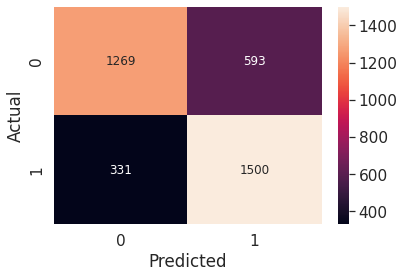

In [ ]:
import sklearn.metrics as sm
import seaborn as sb
import matplotlib.pyplot as plt
array = sm.confusion_matrix(y_test,y_label)
df_cm = pd.DataFrame(array)
# plt.figure(figsize=(10,7))
sb.set(font_scale=1.4) # for label size
sb.heatmap(df_cm, annot=True, annot_kws={"size": 12},fmt='d') # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_label))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1862
           1       0.72      0.82      0.76      1831

    accuracy                           0.75      3693
   macro avg       0.75      0.75      0.75      3693
weighted avg       0.76      0.75      0.75      3693

